In [33]:
import torch
import pandas as pd
from matplotlib import pyplot as plt
import torch.nn as nn

In [94]:
x = torch.randn(1000, 1)*20
y = 3*x + torch.randn(1000, 1)*10
#optional reading the data off of the disk
data = pd.read_csv("ep2_data.csv")
# data['X']

In [88]:
class CustomDataset(torch.utils.data.Dataset):
    # def __init__(self, x, y):
    #     super().__init__()
    #     self.x = x
    #     self.y = y
    
    def __init__(self, data):
        super().__init__()
        self.x = torch.tensor(data['X'], dtype=torch.float32).view(-1, 1)
        self.y = torch.tensor(data['y'], dtype=torch.float32).view(-1, 1)
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]

class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(1, 1)
        print(self.layer.weight.dtype)
    
    def forward(self, x):
        x = self.layer(x)
        return x

In [96]:
input_data = CustomDataset(data)
train_loader = torch.utils.data.DataLoader(input_data, batch_size=10, shuffle=True)
# print(next(iter(train_loader)))

In [99]:
model = LinearRegression()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
mse = torch.nn.MSELoss()

torch.float32


Epoch: 0, Loss: 152.73155212402344
Epoch: 100, Loss: 86.68585968017578
Epoch: 200, Loss: 16.384580612182617
Epoch: 300, Loss: 3.879375457763672
Epoch: 400, Loss: 1.5501701831817627
Epoch: 500, Loss: 1.2953132390975952
Epoch: 600, Loss: 1.5930836200714111
Epoch: 700, Loss: 0.9150692224502563
Epoch: 800, Loss: 0.979452908039093
Epoch: 900, Loss: 0.719127357006073


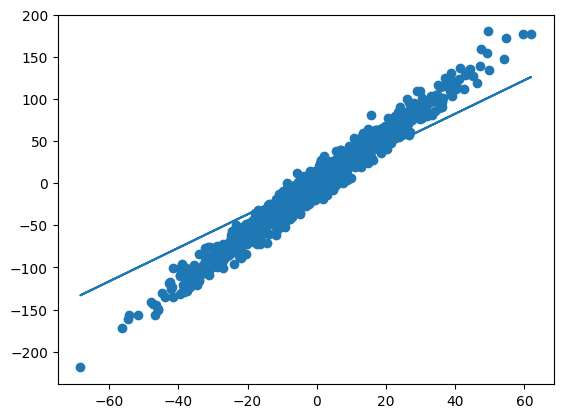

In [100]:
epochs = 1000
for epoch in range(epochs):
    for x_train, y_train in train_loader:
        optimizer.zero_grad()
        pred = model(x_train) 
        loss = mse(pred, y_train)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}")
with torch.no_grad():
    y_pred = model(x)
plt.figure()
plt.scatter(x, y)
plt.plot(x, y_pred)